In [11]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

from mnist import get_dataset, get_model

In [2]:
SEED = 42

In [4]:
baseline = get_model()
baseline.load_state_dict(torch.load(f'models/mnist_pretrained_seed={SEED}.pth'))
ks = [600, 1200, 1800, 2400, 3000]
factor_strategies = ['random', 'identity', 'ekfac']
models = {}

for factor_strategy in factor_strategies:
    for k in ks:
        model = get_model()
        model.load_state_dict(torch.load(f'models/{factor_strategy}/mnist_pretrained_seed={SEED}_k={k}.pth'))
        models[(factor_strategy, k)] = model

In [7]:
def get_accuracy(model, dataset):
    correct = 0
    total = 0
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=False)
    model = model.cuda()
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    model = model.cpu()
    print(total)
    return correct / total

In [8]:
# evaluate baseline
test_dataset = get_dataset('test')
baseline_accuracy = get_accuracy(baseline, test_dataset)
print(f'Baseline accuracy: {baseline_accuracy:.2f}')

10000
Baseline accuracy: 0.96


In [10]:
model_accuracies = {}

# evaluate models
for (factor_strategy, k), model in tqdm(models.items()):
    accuracy = get_accuracy(model, test_dataset)
    model_accuracies[(factor_strategy, k)] = accuracy
    print(f'{factor_strategy} k={k} accuracy: {accuracy:.2f}')

  7%|▋         | 1/15 [00:01<00:21,  1.50s/it]

10000
random k=600 accuracy: 0.96


 13%|█▎        | 2/15 [00:02<00:19,  1.49s/it]

10000
random k=1200 accuracy: 0.96


 20%|██        | 3/15 [00:04<00:17,  1.48s/it]

10000
random k=1800 accuracy: 0.96


 27%|██▋       | 4/15 [00:05<00:16,  1.47s/it]

10000
random k=2400 accuracy: 0.96


 33%|███▎      | 5/15 [00:07<00:14,  1.48s/it]

10000
random k=3000 accuracy: 0.96


 40%|████      | 6/15 [00:08<00:13,  1.48s/it]

10000
identity k=600 accuracy: 0.96


 47%|████▋     | 7/15 [00:10<00:11,  1.48s/it]

10000
identity k=1200 accuracy: 0.96


 53%|█████▎    | 8/15 [00:11<00:10,  1.48s/it]

10000
identity k=1800 accuracy: 0.96


 60%|██████    | 9/15 [00:13<00:08,  1.45s/it]

10000
identity k=2400 accuracy: 0.96


 67%|██████▋   | 10/15 [00:14<00:07,  1.46s/it]

10000
identity k=3000 accuracy: 0.96


 73%|███████▎  | 11/15 [00:16<00:05,  1.47s/it]

10000
ekfac k=600 accuracy: 0.96


 80%|████████  | 12/15 [00:17<00:04,  1.47s/it]

10000
ekfac k=1200 accuracy: 0.97


 87%|████████▋ | 13/15 [00:19<00:02,  1.48s/it]

10000
ekfac k=1800 accuracy: 0.96


 93%|█████████▎| 14/15 [00:20<00:01,  1.47s/it]

10000
ekfac k=2400 accuracy: 0.96


100%|██████████| 15/15 [00:22<00:00,  1.47s/it]

10000
ekfac k=3000 accuracy: 0.97


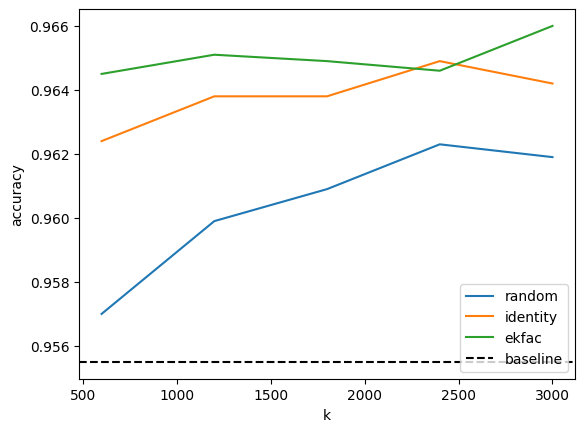

In [13]:
for factor_strategy in factor_strategies:
    accuracies = [model_accuracies[(factor_strategy, k)] for k in ks]
    plt.plot(ks, accuracies, label=factor_strategy)
plt.axhline(baseline_accuracy, color='black', linestyle='--', label='baseline')
plt.xlabel('Percent of Data Added')
plt.ylabel('Test Accuracy')
plt.legend()